In [3]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df_train = pd.read_csv("F:/ETL/Project/Churn_prediction/Churn_pred/train.csv")

In [5]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
df_train.duplicated().sum()

0

In [7]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [9]:
df_train.shape

(4250, 20)

In [10]:
cat=[]
con=[]
for i in df_train.columns:
    if (df_train[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)


In [11]:
df_train.account_length.dtype

dtype('int64')

In [12]:
cat

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [13]:
con

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

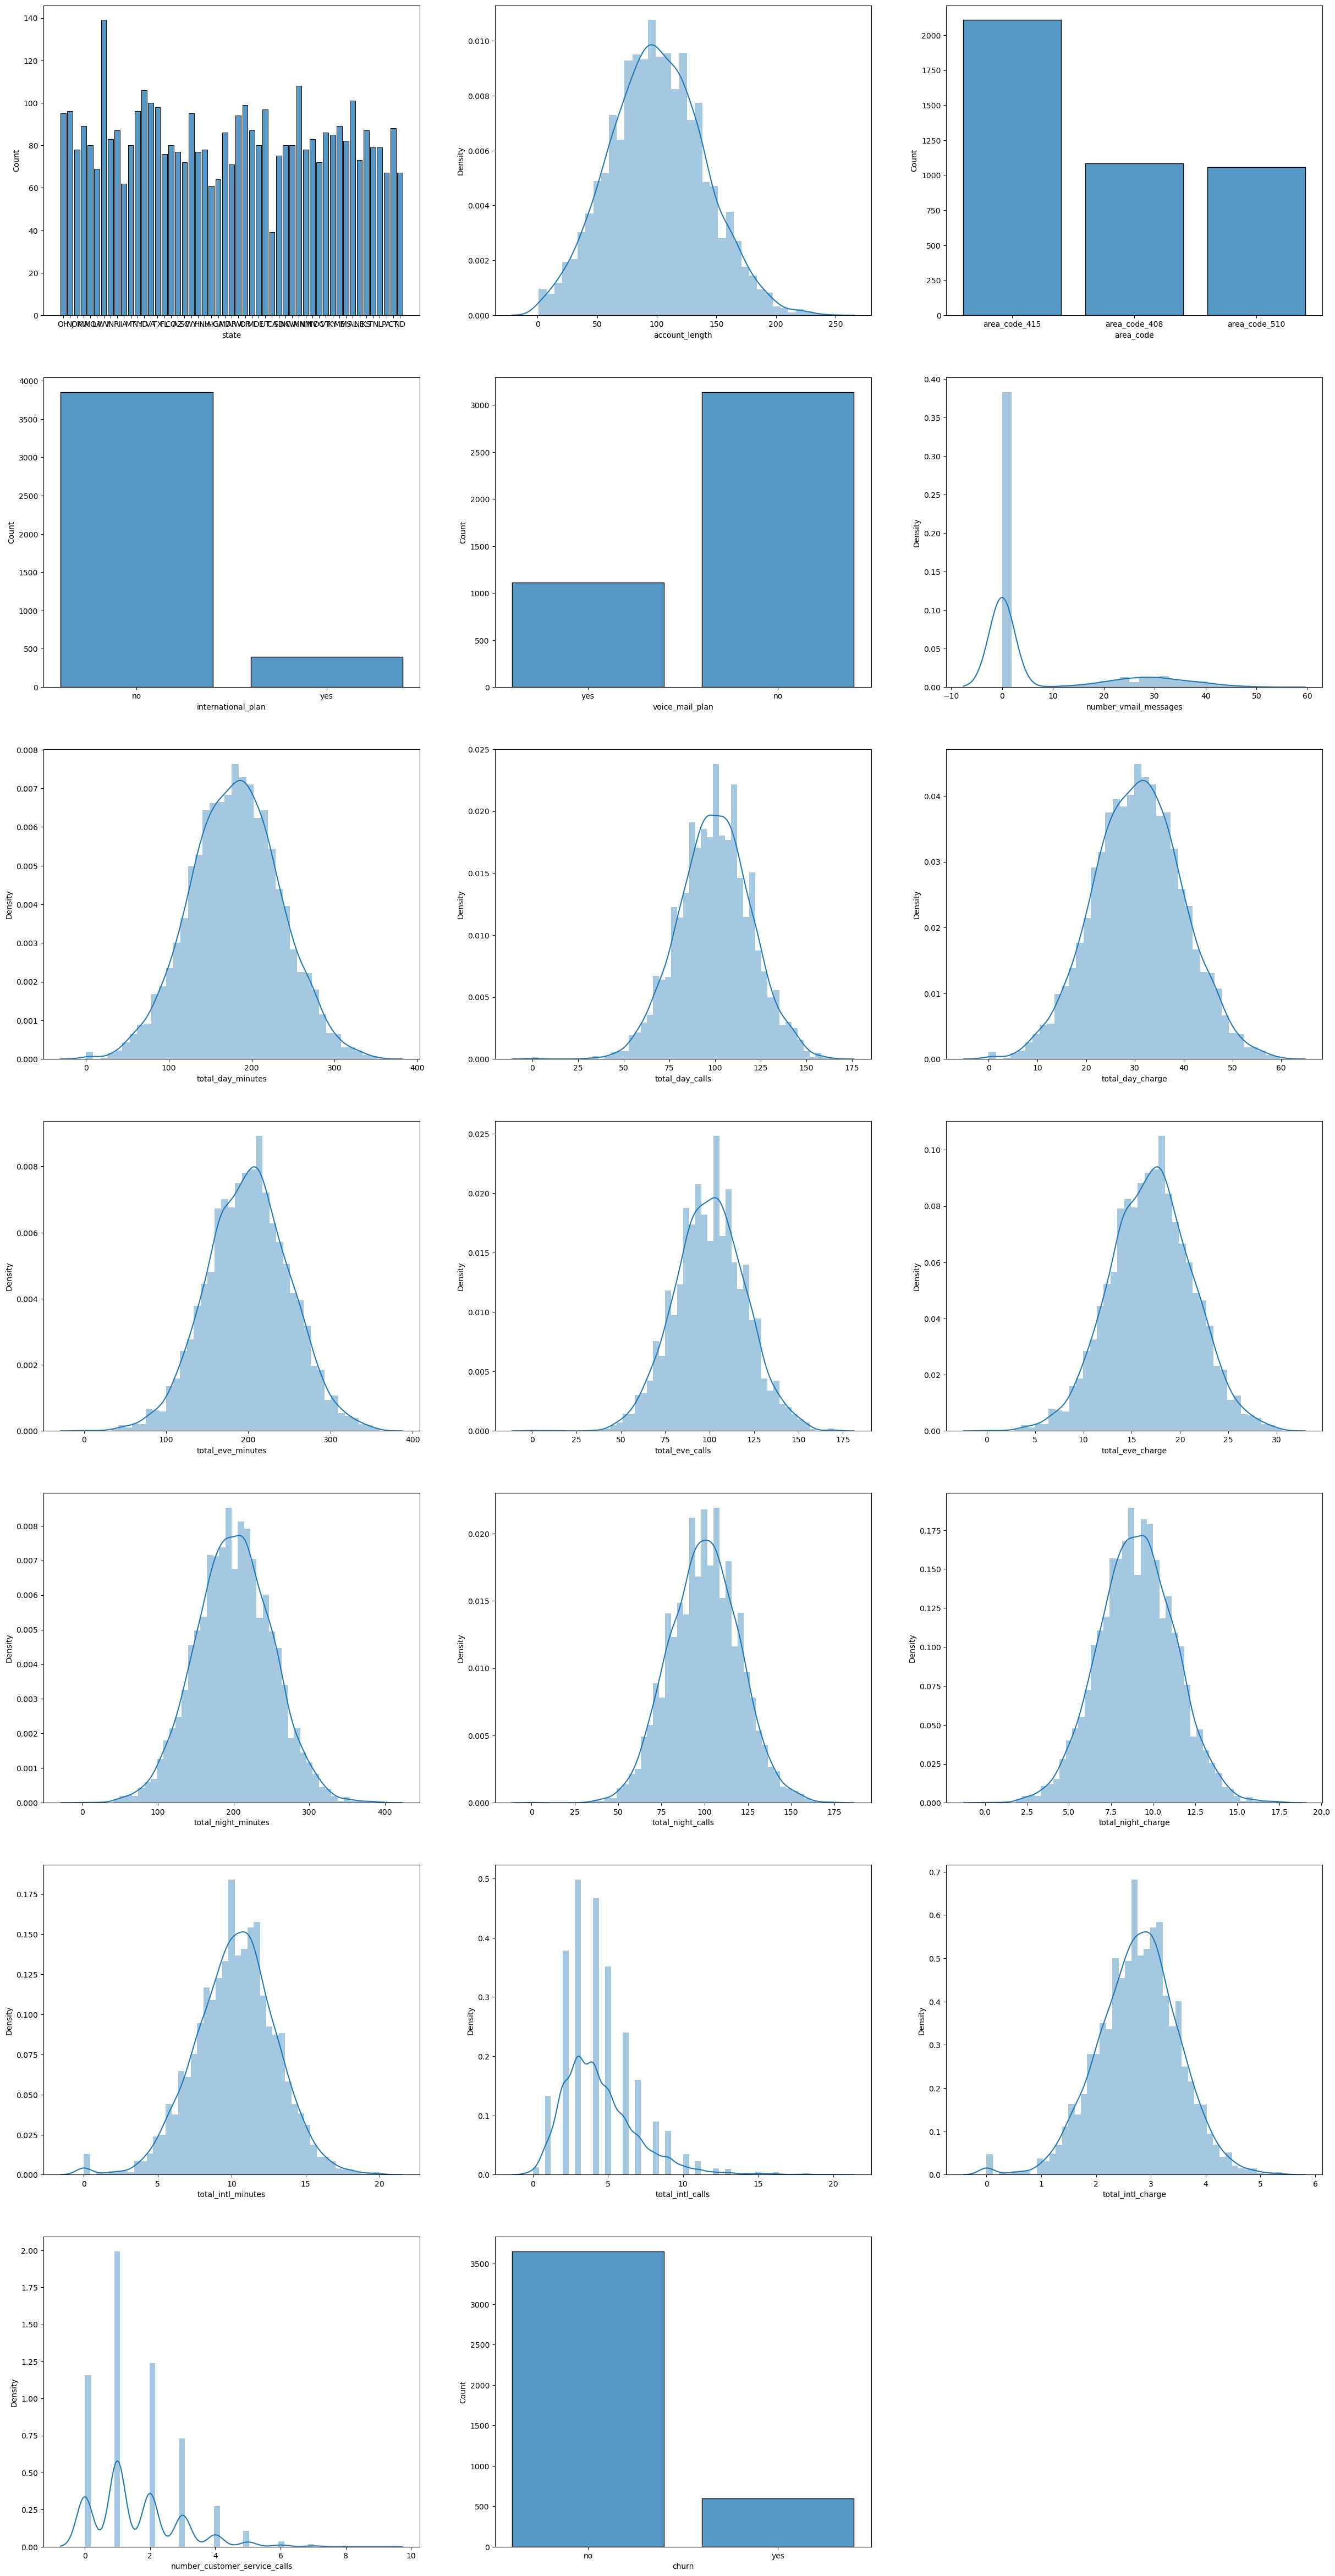

In [15]:
plt.figure(figsize=(30,60))
count = 1
for i in df_train.columns:
    if(df_train[i].dtypes=="object"):
        plt.subplot(7,3,count)
        sns.histplot(data=df_train[i], discrete=True, shrink=.8)
    else:
        plt.subplot(7,3,count)
        sns.distplot(df_train[i])
    count+=1

In [16]:
df_train["state"].value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

In [17]:
len(list(df_train["state"].value_counts()))

51

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=pd.DataFrame(ss.fit_transform(df_train[con]),columns=con)

In [19]:
outliers=[]
for i in con:
    outliers.extend(df1[(df1[i]<-3)|(df1[i]>3)].index)

In [20]:
out=np.unique(outliers)
len(out)

219

In [21]:
df_train=df_train.drop(index=out,axis=0)

In [22]:
df_train.shape

(4031, 20)

In [23]:
df_train.index=range(0,4031,1)

In [24]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [25]:
def chisquare(cat1,cat2,df):
    import pandas as pd
    Q = pd.crosstab(df[cat1],df[cat2])
    from scipy.stats import chi2_contingency
    a,b,c,d = chi2_contingency(Q)
    return b

In [26]:
chisquare("churn","state",df_train)

0.010049555125881956

In [27]:
for i in cat:
    e = chisquare(i,"churn",df_train)
    e = round(e,2)
    print("churn ~",i,"--->",e)

churn ~ state ---> 0.01
churn ~ area_code ---> 0.43
churn ~ international_plan ---> 0.0
churn ~ voice_mail_plan ---> 0.0
churn ~ churn ---> 0.0


In [28]:
def ANOVA(df,cat,con):
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    st = con + " ~ " + cat
    model = ols(st,df).fit()
    Q = anova_lm(model)
    anv = round(Q.iloc[0,-1],4)
    return anv

In [29]:
ANOVA(df_train,"churn","number_vmail_messages")

0.0

In [30]:
for i in con:
    e = ANOVA(df_train,"churn",i)
    e = round(e,4)
    print("churn ~",i,"--->",e)

churn ~ account_length ---> 0.2356
churn ~ number_vmail_messages ---> 0.0
churn ~ total_day_minutes ---> 0.0
churn ~ total_day_calls ---> 0.3103
churn ~ total_day_charge ---> 0.0
churn ~ total_eve_minutes ---> 0.0
churn ~ total_eve_calls ---> 0.4667
churn ~ total_eve_charge ---> 0.0
churn ~ total_night_minutes ---> 0.0017
churn ~ total_night_calls ---> 0.3471
churn ~ total_night_charge ---> 0.0017
churn ~ total_intl_minutes ---> 0.0007
churn ~ total_intl_calls ---> 0.0085
churn ~ total_intl_charge ---> 0.0007
churn ~ number_customer_service_calls ---> 0.0


In [31]:
col_to_drop = ["area_code","account_length"]

In [32]:
df1 = df_train.drop(labels=col_to_drop,axis=1)

In [33]:
df1.head()

,state,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [34]:
df1.shape

(4031, 18)

In [35]:
X=df1.drop(labels=["churn"],axis=1)
Y=df1[["churn"]]

In [36]:
cat=[]
con=[]
for i in X.columns:
    if (X[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)

In [37]:
cat

['state', 'international_plan', 'voice_mail_plan']

In [38]:
con

['number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [39]:
from sklearn.preprocessing import MinMaxScaler
Global_MS = MinMaxScaler()
X1=pd.DataFrame(Global_MS.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)
X_new = Xnew

In [40]:
X_new

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.553191,0.43424,0.698276,0.434218,0.480944,0.517241,0.480952,0.680773,0.525000,0.680977,...,0,0,0,0,0,0,1,0,0,1
1,0.000000,0.69600,0.620690,0.696029,0.230354,0.577586,0.230159,0.374875,0.533333,0.375278,...,0,0,0,0,0,0,1,0,1,0
2,0.000000,0.87520,0.250000,0.875212,0.030354,0.387931,0.030159,0.489170,0.408333,0.489267,...,0,0,0,0,0,0,0,1,1,0
3,0.000000,0.45056,0.612069,0.450593,0.321754,0.681034,0.321825,0.455848,0.675000,0.455959,...,0,0,0,0,0,0,0,1,1,0
4,0.510638,0.61536,0.396552,0.615283,0.996965,0.560345,0.996825,0.541486,0.650000,0.541821,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,0.000000,0.72544,0.405172,0.725391,0.969309,0.413793,0.969444,0.687771,0.225000,0.687639,...,0,0,0,0,0,0,1,0,1,0
4027,0.000000,0.51968,0.241379,0.519669,0.643845,0.387931,0.643651,0.545152,0.325000,0.545522,...,0,0,0,0,0,0,1,0,1,0
4028,0.000000,0.48640,0.405172,0.486354,0.264081,0.336207,0.263889,0.453515,0.408333,0.453738,...,0,0,0,0,1,0,1,0,1,0
4029,0.000000,0.46336,0.508621,0.463392,0.472850,0.715517,0.472619,0.263246,0.533333,0.263509,...,0,0,0,0,0,0,1,0,1,0


In [41]:
X_new.shape

(4031, 69)

In [42]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [43]:
pd.DataFrame(Y).value_counts()

0    3487
1     544
dtype: int64

In [44]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_new,Y,test_size=0.3,random_state=42)

In [46]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras_tuner as kt
from keras import optimizers
from keras_tuner import RandomSearch
from keras.callbacks import EarlyStopping

In [47]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model.add(Dense(units=hp.Int("units_"+str(i),
                                    min_value=32,
                                    max_value=512,
                                    step=32),
                       activation="relu"))
        if i%2 != 0:
            model.add(Dropout(hp.Choice(name='dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5])))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(
        optimizer=optimizers.Adam(
            hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
        loss='binary_crossentropy',
        metrics=["accuracy"])
    return model

In [48]:
from keras_tuner import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='churn_nn',
    project_name="churn_ann",
    overwrite = True
)

In [49]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout1 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [50]:
tuner.search(xtrain,ytrain,epochs=500,callbacks=[EarlyStopping('val_loss', patience=10)],validation_data=(xtest,ytest))

Trial 10 Complete [00h 01m 09s]
val_accuracy: 0.8826446533203125

Best val_accuracy So Far: 0.9157024621963501
Total elapsed time: 00h 07m 29s
INFO:tensorflow:Oracle triggered exit


In [51]:
tuner.results_summary()

Results summary
Results in churn_nn\churn_ann
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 06 summary
Hyperparameters:
num_layers: 4
units_0: 512
units_1: 384
dropout1: 0.2
learning_rate: 0.01
units_2: 416
units_3: 224
dropout3: 0.4
units_4: 192
units_5: 288
dropout5: 0.4
units_6: 128
units_7: 288
dropout7: 0.3
units_8: 32
units_9: 384
dropout9: 0.5
units_10: 384
units_11: 64
dropout11: 0.1
units_12: 288
units_13: 64
dropout13: 0.5
units_14: 96
units_15: 512
dropout15: 0.3
units_16: 64
units_17: 448
dropout17: 0.4
units_18: 512
Score: 0.9157024621963501

Trial 00 summary
Hyperparameters:
num_layers: 5
units_0: 192
units_1: 416
dropout1: 0.2
learning_rate: 0.001
units_2: 32
units_3: 32
dropout3: 0.1
units_4: 32
Score: 0.9148760437965393

Trial 02 summary
Hyperparameters:
num_layers: 19
units_0: 384
units_1: 416
dropout1: 0.1
learning_rate: 0.0001
units_2: 160
units_3: 384
dropout3: 0.3
units_4: 128
units_5: 160
dropout5: 0.1
units_6: 480
units_7: 160
dro

In [52]:
best_model = tuner.get_best_models()[0]
best_model.build(xtrain.shape)

In [53]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (2821, 512)               35840     
                                                                 
 dense_1 (Dense)             (2821, 384)               196992    
                                                                 
 dropout (Dropout)           (2821, 384)               0         
                                                                 
 dense_2 (Dense)             (2821, 416)               160160    
                                                                 
 dense_3 (Dense)             (2821, 224)               93408     
                                                                 
 dropout_1 (Dropout)         (2821, 224)               0         
                                                                 
 dense_4 (Dense)             (2821, 1)                 2

In [54]:
es = EarlyStopping(patience=10,monitor='val_loss')

In [55]:
model_nn = best_model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs = 500,callbacks=es)

Epoch 1/500
89/89 [==============================] - 2s 14ms/step - loss: 0.1746 - accuracy: 0.9387 - val_loss: 0.4278 - val_accuracy: 0.9124
Epoch 2/500
89/89 [==============================] - 1s 12ms/step - loss: 0.1781 - accuracy: 0.9404 - val_loss: 0.4811 - val_accuracy: 0.9099
Epoch 3/500
89/89 [==============================] - 1s 12ms/step - loss: 0.1825 - accuracy: 0.9337 - val_loss: 0.5680 - val_accuracy: 0.8826
Epoch 4/500
89/89 [==============================] - 1s 12ms/step - loss: 0.1781 - accuracy: 0.9341 - val_loss: 0.3942 - val_accuracy: 0.9149
Epoch 5/500
89/89 [==============================] - 1s 12ms/step - loss: 0.1621 - accuracy: 0.9404 - val_loss: 0.3466 - val_accuracy: 0.8983
Epoch 6/500
89/89 [==============================] - 1s 11ms/step - loss: 0.1745 - accuracy: 0.9316 - val_loss: 0.4127 - val_accuracy: 0.9099
Epoch 7/500
89/89 [==============================] - 1s 12ms/step - loss: 0.1908 - accuracy: 0.9408 - val_loss: 0.4366 - val_accuracy: 0.9099
Epoch 

In [56]:
ts_err = model_nn.history['val_accuracy']
tr_err = model_nn.history['accuracy']

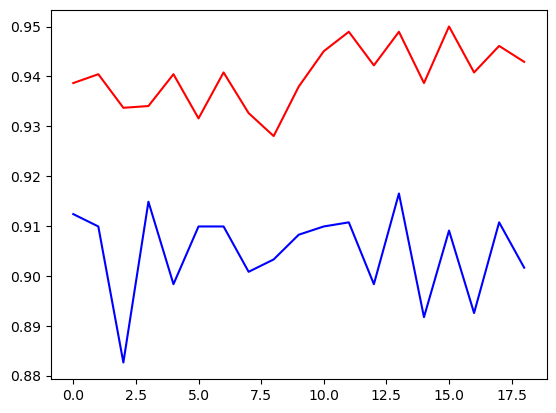

In [57]:
import matplotlib.pyplot as plt
plt.plot(tr_err,c="red")
plt.plot(ts_err,c="blue")

In [61]:
ess = EarlyStopping(patience=10,monitor='loss')

In [62]:
best_model.fit(X_new,Y,epochs = 500,callbacks=ess)

Epoch 1/500
126/126 [==============================] - 2s 15ms/step - loss: 0.1743 - accuracy: 0.9397
Epoch 2/500
126/126 [==============================] - 2s 15ms/step - loss: 0.1544 - accuracy: 0.9494
Epoch 3/500
126/126 [==============================] - 2s 14ms/step - loss: 0.1515 - accuracy: 0.9521
Epoch 4/500
126/126 [==============================] - 2s 14ms/step - loss: 0.1483 - accuracy: 0.9548
Epoch 5/500
126/126 [==============================] - 2s 14ms/step - loss: 0.1541 - accuracy: 0.9499
Epoch 6/500
126/126 [==============================] - 2s 14ms/step - loss: 0.1573 - accuracy: 0.9514
Epoch 7/500
126/126 [==============================] - 2s 15ms/step - loss: 0.1681 - accuracy: 0.9439
Epoch 8/500
126/126 [==============================] - 2s 15ms/step - loss: 0.1696 - accuracy: 0.9457
Epoch 9/500
126/126 [==============================] - 2s 14ms/step - loss: 0.1755 - accuracy: 0.9449
Epoch 10/500
126/126 [==============================] - 2s 14ms/step - loss: 0.142

In [64]:
neural_model = best_model

# Test data

In [121]:
df_test = pd.read_csv("F:/ETL/Project/Churn_prediction/Churn_pred/test.csv")

In [122]:
df_test.head(3)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4


In [123]:
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [124]:
col_to_drop_test = ["area_code","account_length","id"]

In [125]:
df2 = df_test.drop(labels=col_to_drop_test,axis=1)

In [126]:
cat=[]
con=[]
for i in df2.columns:
    if (df2[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)

In [127]:
cat

['state', 'international_plan', 'voice_mail_plan']

In [128]:
con

['number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [129]:
from sklearn.preprocessing import MinMaxScaler
Global_MS = MinMaxScaler()
X1=pd.DataFrame(Global_MS.fit_transform(df2[con]),columns=con)
X2=pd.get_dummies(df2[cat])
X_test_n=X1.join(X2)

In [130]:
X_test_n

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,...,0,0,0,0,0,0,1,0,0,1
1,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,...,0,0,0,0,0,0,0,1,1,0
2,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,...,0,0,0,0,0,0,1,0,1,0
3,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,...,0,1,0,0,0,0,1,0,1,0
4,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.000000,0.315992,0.483871,0.315945,0.586767,0.472441,0.587049,0.484365,0.634615,0.484397,...,0,0,0,0,0,0,1,0,1,0
746,0.000000,0.486846,0.637097,0.486698,0.719699,0.370079,0.719745,0.609126,0.641026,0.609220,...,0,0,1,0,0,0,1,0,1,0
747,0.000000,0.507538,0.411290,0.507390,0.678496,0.283465,0.678698,0.519145,0.647436,0.519149,...,0,0,0,0,1,0,1,0,1,0
748,0.000000,0.378658,0.403226,0.378543,0.425865,0.716535,0.426044,0.515316,0.544872,0.515603,...,0,0,0,0,0,0,1,0,1,0


In [131]:
pred = neural_model.predict(X_test_n)

24/24 [==============================] - 0s 4ms/step


In [132]:
y_pred = (pred >= 0.5).astype(int)

In [133]:
result["churn"] = pd.DataFrame(y_pred)

In [134]:
df_final_sub= result.replace([0, 1], ["no",'yes'])

In [135]:
df_final_sub['churn'].value_counts()

no     678
yes     72
Name: churn, dtype: int64

In [136]:
df_final_sub['id'] = df_test[["id"]]

In [137]:
df_final_sub

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [138]:
df_final_sub.to_csv("F:/ETL/Project/Churn_prediction/Churn_pred/final.csv")